#### Dataset Preparation


In [2]:
import numpy as np


np.random.seed(42)

In [3]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

c:\Users\Jan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
dataset = load_wine()
x = dataset.data
y = dataset.target

In [5]:
df = pd.DataFrame(x, columns=dataset.feature_names)
df["y"] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### CART Classifier


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 4, 8, 10],
}

clf = DecisionTreeClassifier()
grid_cv = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 8, 10]})

In [8]:
print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")

Parameters of best model: {'criterion': 'gini', 'max_depth': None}
Score of best model: 0.9448717948717948


#### Train Best Model


In [9]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)

print(f"Accuracy: {score}")

Accuracy: 0.9444444444444444


In [10]:
# graphviz
from sklearn.tree import plot_tree

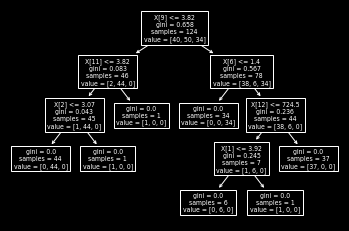

In [11]:
_ = plot_tree(clf)